In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook  
%matplotlib inline 
import astropy
from astropy import units as u
import astropy.table as Table
from astropy.table import QTable
from astropy.io import ascii
from astropy.io import fits
import scipy.interpolate as interp
from synphot import units
from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D,Empirical1D
from dust_extinction.dust_extinction import F99

In [2]:
data1 = ascii.read('AATau_IR2008.txt')
data2 = ascii.read('AATau_opt2008.txt')
data = Table.vstack([data2, data1])
allwav_2008=data['wavelength']
alldata_2008=data['flux']

data1 = ascii.read('AATau_IR2014dec02.txt')
data2 = ascii.read('AATau_opt2014dec02.txt')
data = Table.vstack([data2, data1])
allwav_dec02=data['wavelength']
alldata_dec02=data['flux']

data1 = ascii.read('AATau_IR2014dec12.txt')
data2 = ascii.read('AATau_opt2014dec12.txt')
data = Table.vstack([data2, data1])
allwav_dec12=data['wavelength']
alldata_dec12=data['flux']

In [29]:
data

wavelength,flux
micron,erg / (Angstrom cm2 s)
float32,float32
0.3301059901714325,5.822395423934102e-16
0.33034399151802063,7.114821588260762e-16
0.33058199286460876,6.145950892477812e-16
0.3308199942111969,6.278874184703653e-16
0.33105799555778503,4.0985629387744126e-16
0.33129599690437317,6.128746594527893e-16
0.3315339982509613,1.2863249860075882e-15
0.33177199959754944,8.213407968377421e-16


In [3]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)
alldata_2008,interp2008(allwav_2008)*alldata_2008.unit

(<Quantity [6.5482902e-15, 1.3214700e-14, 8.4366303e-15, ..., 1.6981821e-14,
            1.7001905e-14, 1.6815852e-14] erg / (Angstrom cm2 s)>,
 <Quantity [6.5482902e-15, 1.3214700e-14, 8.4366303e-15, ..., 1.6981821e-14,
            1.7001905e-14, 1.6815852e-14] erg / (Angstrom cm2 s)>)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


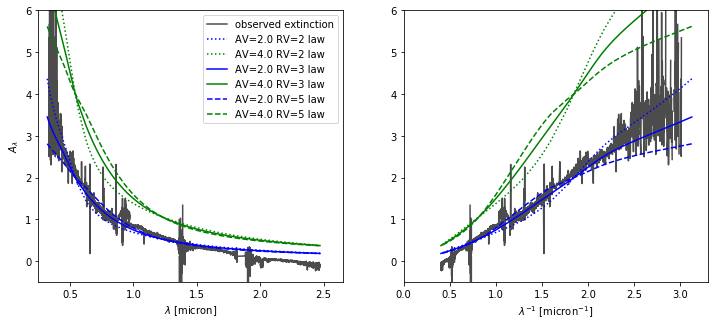

In [4]:
fig,axs=plt.subplots(1,2,figsize=(12,5))

ext_dec02=-2.5*np.log10(alldata_dec02.value/interp2008(allwav_dec02))

axs[0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='observed extinction')
axs[1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2.0 RV='+legend+' law')
    axs[1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4.0 RV='+legend+' law')
    axs[1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

axs[0].legend(loc='best')
axs[0].set_ylabel('$A_\lambda$')
axs[0].set_xlabel('$\lambda$ [micron]')
axs[1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0].set_ylim(-0.5,6.0)
axs[1].set_ylim(-0.5,6.0)
axs[0].set_xlim(0.25,2.65)
axs[1].set_xlim(0,3.3)

plt.show()

Veiling is "an excess of near-infrared emission with presumably arised from the inner edge of a cool circumstellar disk." (Faesi et al. 2012).  Because veiling raises the level of the flux both in and out of the line, the lines appear weaker when measured with respect to their local continuum.  However, the total integrated flux missing from the continuum ($F_{abs}$) remains the same.  So,
$$
EW_{\rm unveiled} = \frac{F_{abs}}{F_{\lambda, *}}
$$
and
$$
EW_{\rm veiled} = \frac{F_{abs}}{F_{\lambda, *}+F_{\lambda, excess}}
$$

We can define a veiling parameter as 
$$
r_{\lambda} = \frac{F_{\lambda, excess}}{F_{\lambda, *}}.
$$
Therefore, with measured equivalent widths,
$$
r_{\lambda} = \frac{EW_{\rm unveiled} - EW_{\rm veiled}}{EW_{\rm veiled}} = \frac{EW_{\rm unveiled}}{EW_{\rm veiled}} - 1.
$$

The format of the files is 
date : name : wavelength : EW  : integrated_flux  :   x_blue_continuum : y_blue_continuum : x_red_continuum : y_red continuum

Different attempts may be significantly different line, possible line combinations.  Dates are 2006, 2008, 2012, 2014.92, and 2014.96.

In [5]:
t1=Table.Table.read('EqW_1.txt',format='ascii')
t2=Table.Table.read('EqW_2.txt',format='ascii')
t3=Table.Table.read('EqW_3.txt',format='ascii')

In [32]:
# t1['LineLambda']
date=2006
t1['LineLambda'][t1['Epoch']==date]


1.0348
1.05888
1.1258
1.1645
1.1887
1.24368
1.2526
1.29045
1.3141
1.504
1.5172


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


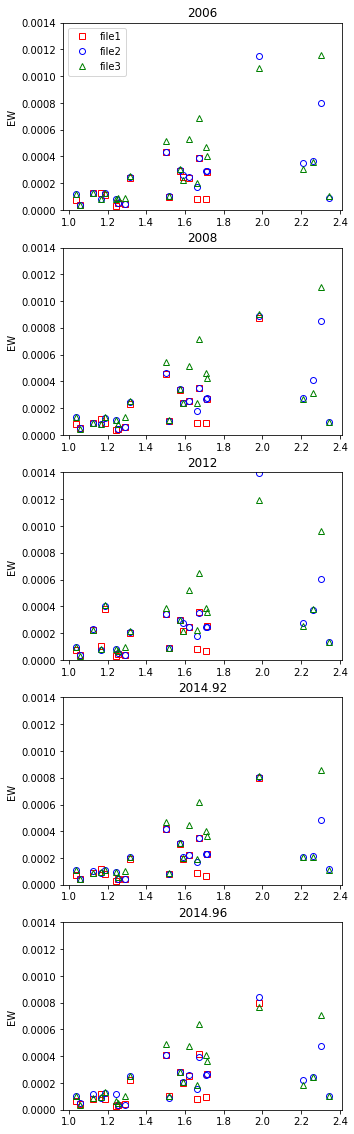

In [6]:
fig,ax=plt.subplots(5,1,figsize=(5,20))
i=0
for date in [2006,2008,2012,2014.92,2014.96]:
    ax[i].plot(t1['LineLambda'][t1['Epoch']==date],t1['EqW'][t1['Epoch']==date],'rs',fillstyle='none',label='file1')
    ax[i].plot(t2['LineLambda'][t2['Epoch']==date],t2['EqW'][t2['Epoch']==date],'bo',fillstyle='none',label='file2')
    ax[i].plot(t3['LineLambda'][t3['Epoch']==date],t3['EqW'][t3['Epoch']==date],'g^',fillstyle='none',label='file3')
    ax[i].set_title(date)
    ax[i].set_ylabel('EW')
    ax[i].set_ylim(0,0.0014)
    i+=1
ax[0].legend()
fig.show()

In [7]:
t1['Run']=1
t2['Run']=2
t3['Run']=3


In [8]:
t=Table.vstack([t1,t2,t3])

In [9]:
t2014a=t[t['Epoch']==2014.92]
t2014b=t[t['Epoch']==2014.96]
t2008=t[t['Epoch']==2008]

In [10]:
r2014a=t2008['EqW']/t2014a['EqW']-1
r2014b=t2008['EqW']/t2014b['EqW']-1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


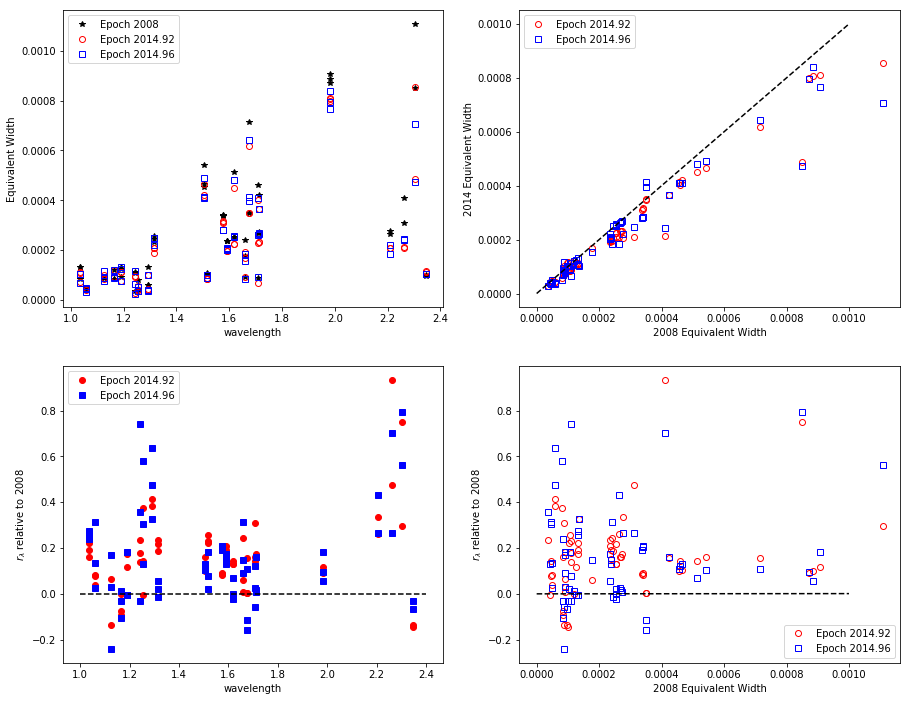

In [11]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,12))

ax1.plot(t2008['LineLambda'], t2008['EqW'], 'k*', label='Epoch 2008')
ax1.plot(t2008['LineLambda'], t2014a['EqW'], 'ro', fillstyle='none', label='Epoch 2014.92')
ax1.plot(t2008['LineLambda'], t2014b['EqW'], 'bs', fillstyle='none', label='Epoch 2014.96')
ax1.legend()
ax1.set_ylabel('Equivalent Width')
ax1.set_xlabel('wavelength')

ax2.plot(t2008['EqW'], t2014a['EqW'], 'ro', fillstyle='none', label='Epoch 2014.92')
ax2.plot(t2008['EqW'], t2014b['EqW'],  'bs', fillstyle='none', label='Epoch 2014.96')
ax2.legend()
ax2.set_ylabel('2014 Equivalent Width')
ax2.set_xlabel('2008 Equivalent Width')
ax2.plot([0,0.001],[0,0.001],'--k')



ax3.plot(t2008['LineLambda'] ,r2014a, 'ro', label='Epoch 2014.92')
ax3.plot(t2008['LineLambda'] ,r2014b, 'bs', label='Epoch 2014.96')
ax3.set_xlabel('wavelength')
ax3.set_ylabel('$r_\lambda$ relative to 2008')
ax3.plot([1,2.4],[0,0],'--k')
ax3.legend()


ax4.plot(t2008['EqW'], r2014a, 'ro', fillstyle='none', label='Epoch 2014.92')
ax4.plot(t2008['EqW'], r2014b, 'bs', fillstyle='none', label='Epoch 2014.96')
ax4.legend(loc="lower right")
ax4.set_ylabel('$r_\lambda$ relative to 2008')
ax4.set_xlabel('2008 Equivalent Width')
ax4.plot([0,0.001],[0,0.001],'--k')



fig.show()

Try remaking the lower left plot including which file as symbol shape.

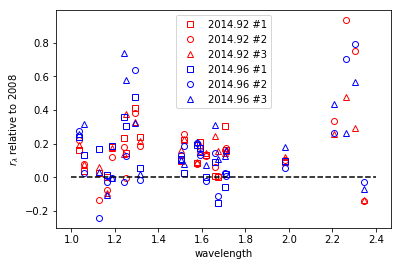

In [12]:
fig,ax3=plt.subplots(1,1)

ax3.plot(t2008['LineLambda'][t2008['Run']==1] ,r2014a[t2008['Run']==1], 'rs', fillstyle='none',label='2014.92 #1')
ax3.plot(t2008['LineLambda'][t2008['Run']==2] ,r2014a[t2008['Run']==2], 'ro', fillstyle='none',label='2014.92 #2')
ax3.plot(t2008['LineLambda'][t2008['Run']==3] ,r2014a[t2008['Run']==3], 'r^', fillstyle='none',label='2014.92 #3')


ax3.plot(t2008['LineLambda'][t2008['Run']==1] ,r2014b[t2008['Run']==1], 'bs', fillstyle='none',label='2014.96 #1')
ax3.plot(t2008['LineLambda'][t2008['Run']==2] ,r2014b[t2008['Run']==2], 'bo', fillstyle='none',label='2014.96 #2')
ax3.plot(t2008['LineLambda'][t2008['Run']==3] ,r2014b[t2008['Run']==3], 'b^', fillstyle='none',label='2014.96 #3')
ax3.set_xlabel('wavelength')
ax3.set_ylabel('$r_\lambda$ relative to 2008')
ax3.plot([1,2.4],[0,0],'--k')
ax3.legend()

plt.show()
    
    

Some lines are clearly better than others.  Let's get a list of unique line names, then make a separate plot by line.

In [13]:
uniquelines=Table.unique(t2008,keys="LineName")['LineName','LineLambda']
uniquelines.sort('LineLambda')
uniquelines

LineName,LineLambda
str9,float64
Ca-1.03,1.0348
Si-1.06,1.05888
Al-1.12,1.1258
Fe-1.17,1.1645
Fe-1.19,1.1887
K-1.24,1.24368
K-1.25,1.2526
Mn-1.29,1.29045
Al-1.31,1.3141


In [14]:
# and sort by wavelength
lines=uniquelines['LineName']
lines

Ca-1.03
Si-1.06
Al-1.12
Fe-1.17
Fe-1.19
K-1.24
K-1.25
Mn-1.29
Al-1.31
Mg-1.50
KI-1.51


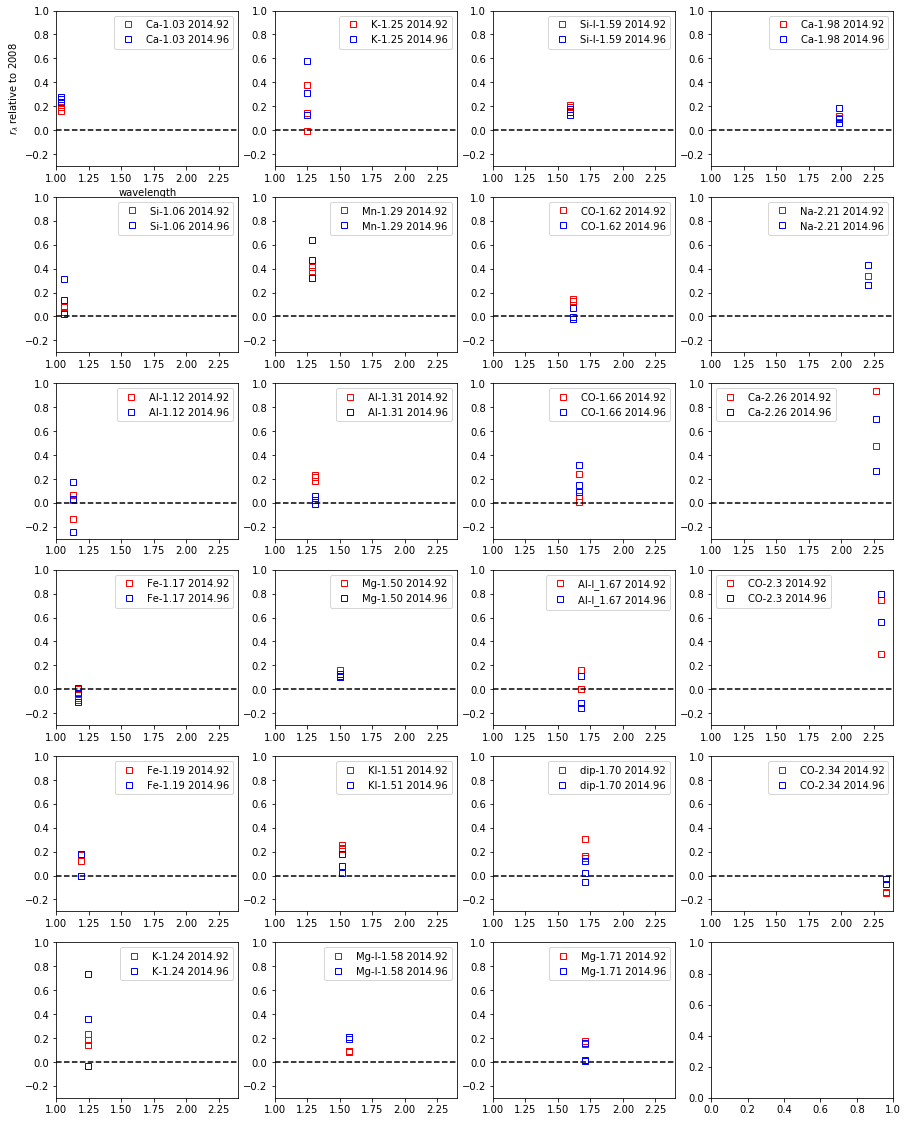

In [15]:
fig,axs=plt.subplots(6,4,figsize=(15,20))

for j in range(4):

    for i in range(6):

        if (i+j*6<23):
            
            axs[i,j].plot(t2008['LineLambda'][t2008['LineName']==lines[i+j*6]],r2014a[t2008['LineName']==lines[i+j*6]],
                          'rs',fillstyle='none',label=lines[i+j*6]+' 2014.92')
            axs[i,j].plot(t2008['LineLambda'][t2008['LineName']==lines[i+j*6]],r2014b[t2008['LineName']==lines[i+j*6]],
                          'bs',fillstyle='none',label=lines[i+j*6]+' 2014.96')
            axs[i,j].set_xlim(1,2.4)
            axs[i,j].set_ylim(-0.3,1.0)
            axs[i,j].plot([1,2.4],[0,0],'--k')
            axs[i,j].legend()

axs[0,0].set_ylabel('$r_\lambda$ relative to 2008')
axs[0,0].set_xlabel('wavelength')

plt.show()

Or, maybe we should only use 2008 EqW > 0.0004?  Notice that gets rid of *all* the negatives.

[]

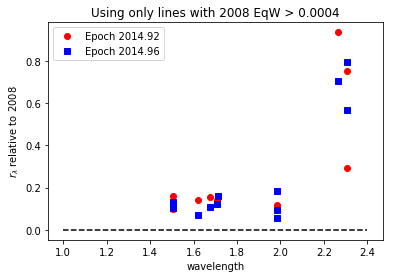

In [16]:
mask=t2008['EqW']>0.0004
plt.plot(t2014a['LineLambda'][mask] ,r2014a[mask], 'ro', label='Epoch 2014.92')
plt.plot(t2014b['LineLambda'][mask] ,r2014b[mask], 'bs', label='Epoch 2014.96')
plt.xlabel('wavelength')
plt.ylabel('$r_\lambda$ relative to 2008')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.title('Using only lines with 2008 EqW > 0.0004')
plt.plot()

I wonder why the strong lines are are longward of 1.4 microns.

Now it looks like a power law.  Take a log and fit a line.

In [17]:
za=np.polyfit(np.log10(t2014a['LineLambda'][mask]) , np.log10(r2014a[mask]), 1)

zb=np.polyfit(np.log10(t2014b['LineLambda'][mask]) , np.log10(r2014b[mask]), 1)


[]

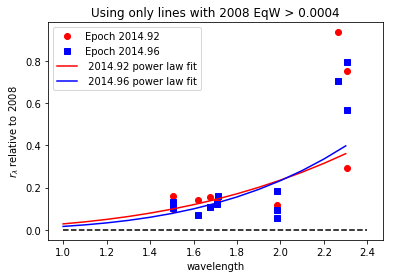

In [18]:
mask=t2008['EqW']>0.0004
plt.plot(t2014a['LineLambda'][mask] ,r2014a[mask], 'ro', label='Epoch 2014.92')
plt.plot(t2014b['LineLambda'][mask] ,r2014b[mask], 'bs', label='Epoch 2014.96')


x=np.arange(1,2.4,.1)
plt.plot(x, 10**(za[1]) * x**(za[0]),'r',label=' 2014.92 power law fit')
plt.plot(x, 10**(zb[1]) * x**(zb[0]),'b',label=' 2014.96 power law fit')


plt.xlabel('wavelength')
plt.ylabel('$r_\lambda$ relative to 2008')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.title('Using only lines with 2008 EqW > 0.0004')
plt.plot()

Now we check to see that veiling is indeed independent of total integrated line flux:

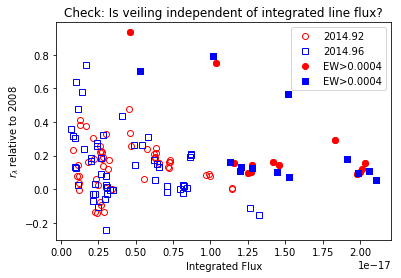

In [19]:
mask=t2008['EqW']>0.0004

plt.plot(t2014a['Flux'], r2014a, 'ro', fillstyle='none', label='2014.92')
plt.plot(t2014b['Flux'], r2014b, 'bs', fillstyle='none', label='2014.96')
plt.plot(t2014a['Flux'][mask], r2014a[mask], 'ro', label='EW>0.0004')
plt.plot(t2014b['Flux'][mask], r2014b[mask], 'bs', label='EW>0.0004')

plt.title('Check: Is veiling independent of integrated line flux?')
plt.xlabel('Integrated Flux')
plt.ylabel('$r_\lambda$ relative to 2008')
plt.legend()
plt.show()

cf a blind fit of all the EW measurements:

[]

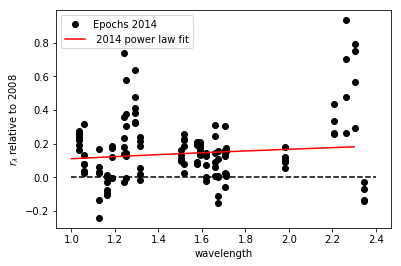

In [20]:
t2014=Table.vstack([t2014a,t2014b])
r2014=np.hstack((r2014a,r2014b))

positive=(r2014>0)
z=np.polyfit(np.log10(t2014['LineLambda'][positive]) , np.log10(r2014[positive]), 1)

plt.plot(t2014['LineLambda'],r2014, 'ko', label='Epochs 2014')

x=np.arange(1,2.4,.1)
plt.plot(x, 10**(z[1]) * x**(z[0]),'r',label=' 2014 power law fit')

plt.xlabel('wavelength')
plt.ylabel('$r_\lambda$ relative to 2008')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.plot()

In [21]:
positive


array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
# Original:
# linewave=np.array([1.03,1.06,1.19,1.25,1.31,1.5,1.58,1.59,
#                    1.67,1.71,1.98,2.21,2.26,2.3])
# line_dec02=np.array([0.957,1.072,0.902,0.897,0.803,0.974,
#                      0.912,0.882,0.967,0.859,1.4,0.765,0.764,0.608])

# Adding short wavelengths as no veiling, adding long wavelength as...a guess:
linewave=np.array([0.3,1.0,1.03,1.06,1.19,1.25,1.31,1.5,1.58,1.59,
                   1.67,1.71,1.98,2.21,2.26,2.3,2.5])
line_dec02=np.array([1.0,1.0,0.957,1.072,0.902,0.897,0.803,0.974,
                     0.912,0.882,0.967,0.859,1.4,0.765,0.764,0.608,0.765])

These measurements are line_epoch / line_2008 and are less than 1, which means the lines are weaker in 2012 and 2014 than in 2008.  They are equivalent to EW_veiled / EW_unveiled.

In [23]:
r=1/line_dec02 - 1
r

array([ 0.        ,  0.        ,  0.04493208, -0.06716418,  0.10864745,
        0.1148272 ,  0.24533001,  0.02669405,  0.09649123,  0.13378685,
        0.03412616,  0.16414435, -0.28571429,  0.30718954,  0.30890052,
        0.64473684,  0.30718954])

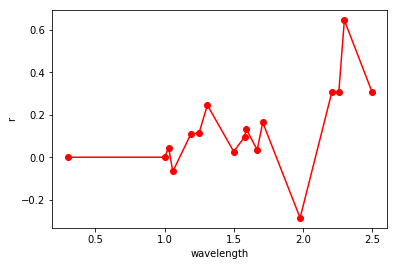

In [24]:
plt.plot(linewave,r,'-ro')
plt.xlabel('wavelength')
plt.ylabel('r')
plt.show()

In [25]:
rinterp=interp.interp1d(linewave,r)

In [26]:
allwav_dec02.min(),allwav_dec02.max()

(<Quantity 0.330106 micron>, <Quantity 2.47024 micron>)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10


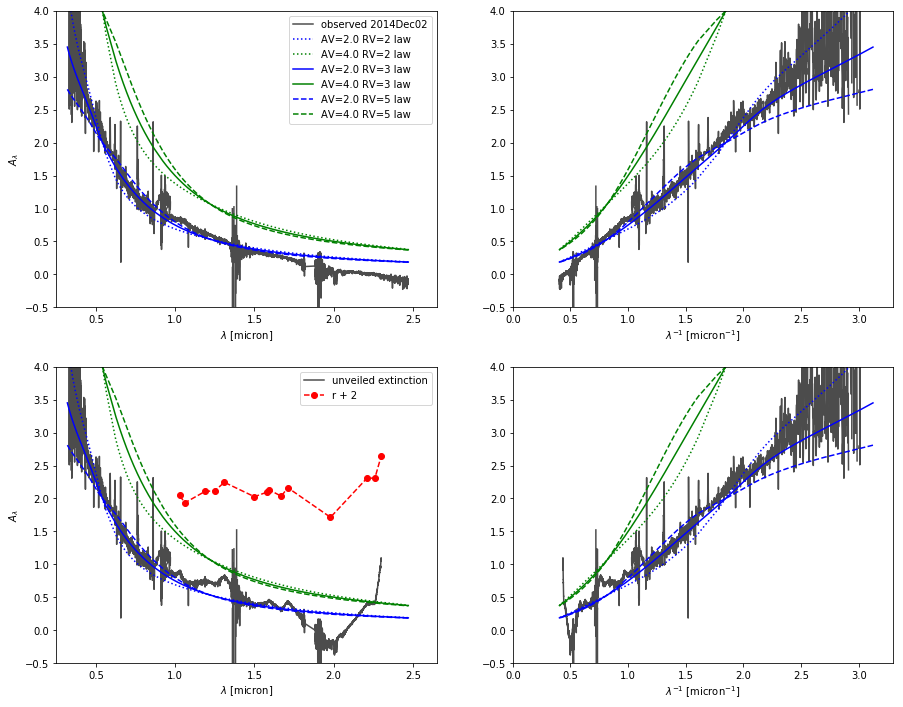

In [27]:
fig,axs=plt.subplots(2,2,figsize=(15,12))


axs[0,0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='observed 2014Dec02')
axs[0,1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[0,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2.0 RV='+legend+' law')
    axs[0,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[0,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4.0 RV='+legend+' law')
    axs[0,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

axs[0,0].legend(loc='best')
axs[0,0].set_ylabel('$A_\lambda$')
axs[0,0].set_xlabel('$\lambda$ [micron]')
axs[0,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0,0].set_ylim(-0.5,4.0)
axs[0,1].set_ylim(-0.5,4.0)
axs[0,0].set_xlim(0.25,2.65)
axs[0,1].set_xlim(0,3.3)


# remove excess flux:
ext_dec02_noveil=-2.5*np.log10((1-rinterp(allwav_dec02.value))*alldata_dec02.value/interp2008(allwav_dec02))


# clip everything past the last line:
i=np.where(allwav_dec02<linewave[-2]*u.micron)
end=i[0][-1]

axs[1,0].plot(allwav_dec02[:end],ext_dec02_noveil[:end],'k',alpha=0.7,label='unveiled extinction')
axs[1,1].plot(1./allwav_dec02[:end],ext_dec02_noveil[:end],'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[1,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)
    axs[1,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

axs[1,0].plot(linewave[2:-1],r[2:-1]+2,'--ro',label='r + 2')

axs[1,0].legend(loc='best')
axs[1,0].set_ylabel('$A_\lambda$')
axs[1,0].set_xlabel('$\lambda$ [micron]')
axs[1,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[1,0].set_ylim(-0.5,4.0)
axs[1,1].set_ylim(-0.5,4.0)
axs[1,0].set_xlim(0.25,2.65)
axs[1,1].set_xlim(0,3.3)


plt.show()